<a href="https://colab.research.google.com/github/khaerul21/CNN/blob/main/Artspectra.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from PIL import Image
import numpy as np

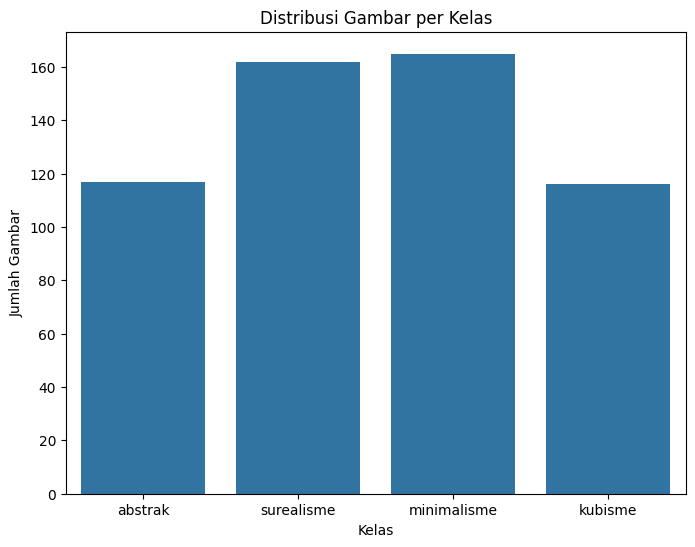

In [ ]:
# Path ke folder dataset
dataset_path = "/content/drive/MyDrive/SEMESTER 5/DeepLearning/Dataset/ARTSPECTRA_DataSet"

# Inisialisasi daftar kelas
class_names = ["abstrak", "surealisme", "minimalisme", "kubisme"]

# Hitung jumlah gambar per kelas
class_counts = {}
for class_name in class_names:
    class_path = os.path.join(dataset_path, class_name)
    class_counts[class_name] = len(os.listdir(class_path))

# Plot distribusi gambar per kelas
plt.figure(figsize=(8, 6))
sns.barplot(x=list(class_counts.keys()), y=list(class_counts.values()))
plt.title("Distribusi Gambar per Kelas")
plt.xlabel("Kelas")
plt.ylabel("Jumlah Gambar")
plt.show()


In [ ]:
# Inisialisasi list untuk menyimpan dimensi
image_dims = {class_name: [] for class_name in class_names}

# Loop untuk mendapatkan dimensi tiap gambar
for class_name in class_names:
    class_path = os.path.join(dataset_path, class_name)
    for img_name in os.listdir(class_path):
        img_path = os.path.join(class_path, img_name)
        img = Image.open(img_path)
        image_dims[class_name].append(img.size)  # (width, height)

# Hitung ukuran rata-rata per kelas
avg_dims = {class_name: np.mean(image_dims[class_name], axis=0) for class_name in class_names}
print("Ukuran rata-rata per kelas:", avg_dims)


Ukuran rata-rata per kelas: {'abstrak': array([341.97435897, 289.67521368]), 'surealisme': array([210.        , 239.77777778]), 'minimalisme': array([220.29090909, 233.59393939]), 'kubisme': array([665.12068966, 803.14655172])}


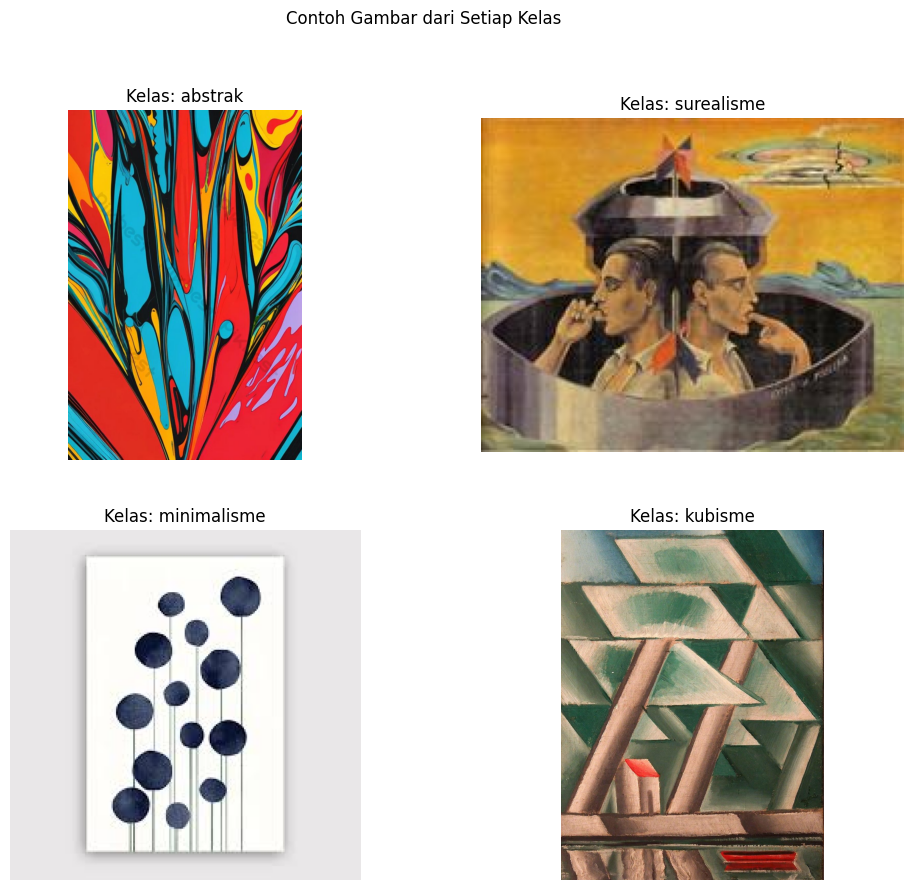

In [ ]:
# Menampilkan contoh gambar dari setiap kelas
plt.figure(figsize=(12, 10))
for idx, class_name in enumerate(class_names):
    class_path = os.path.join(dataset_path, class_name)
    img_name = os.listdir(class_path)[0]  # ambil gambar pertama
    img_path = os.path.join(class_path, img_name)
    img = Image.open(img_path)

    plt.subplot(2, 2, idx + 1)
    plt.imshow(img)
    plt.title(f"Kelas: {class_name}")
    plt.axis("off")

plt.suptitle("Contoh Gambar dari Setiap Kelas")
plt.show()


In [ ]:
# Inisialisasi dictionary untuk menyimpan rata-rata RGB per kelas
avg_rgb_values = {class_name: [] for class_name in class_names}

# Hitung rata-rata RGB per gambar
for class_name in class_names:
    class_path = os.path.join(dataset_path, class_name)
    for img_name in os.listdir(class_path):
        img_path = os.path.join(class_path, img_name)
        img = cv2.imread(img_path)
        avg_rgb = img.mean(axis=(0, 1))  # Rata-rata per kanal (B, G, R)
        avg_rgb_values[class_name].append(avg_rgb)

# Visualisasikan rata-rata warna
for class_name, rgb_values in avg_rgb_values.items():
    avg_rgb = np.mean(rgb_values, axis=0)
    print(f"Rata-rata warna RGB untuk {class_name}: {avg_rgb}")


Rata-rata warna RGB untuk abstrak: [110.62763379 122.01185681 138.22050722]
Rata-rata warna RGB untuk surealisme: [101.72427974 115.50572154 129.74918043]
Rata-rata warna RGB untuk minimalisme: [165.13207291 172.6106423  179.42495655]
Rata-rata warna RGB untuk kubisme: [ 95.13224383 108.32063066 121.4794252 ]


In [ ]:
from skimage.feature import hog

# Ekstraksi fitur HOG untuk analisis tekstur
hog_features = {class_name: [] for class_name in class_names}

for class_name in class_names:
    class_path = os.path.join(dataset_path, class_name)
    for img_name in os.listdir(class_path):
        img_path = os.path.join(class_path, img_name)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Ubah ke grayscale
        img_resized = cv2.resize(img, (128, 128))  # Resize untuk konsistensi
        hog_feature = hog(img_resized, pixels_per_cell=(8, 8), cells_per_block=(2, 2))
        hog_features[class_name].append(hog_feature)

# Periksa panjang vektor fitur untuk setiap kelas
print({class_name: len(features) for class_name, features in hog_features.items()})


{'abstrak': 117, 'surealisme': 162, 'minimalisme': 165, 'kubisme': 116}


In [ ]:
# Mengecek gambar rusak
for class_name in class_names:
    class_path = os.path.join(dataset_path, class_name)
    for img_name in os.listdir(class_path):
        img_path = os.path.join(class_path, img_name)
        try:
            img = Image.open(img_path)
            img.verify()  # Verifikasi gambar
        except (IOError, SyntaxError) as e:
            print(f"Gambar rusak ditemukan: {img_path}")


In [ ]:
# Mengecek ukuran gambar yang tidak sesuai
expected_size = (224, 224)  # Ukuran standar yang diinginkan
for class_name in class_names:
    class_path = os.path.join(dataset_path, class_name)
    for img_name in os.listdir(class_path):
        img_path = os.path.join(class_path, img_name)
        img = Image.open(img_path)
        if img.size != expected_size:
            print(f"Gambar {img_name} tidak sesuai ukuran ({img.size})")



Gambar abstark00002.jpg tidak sesuai ukuran ((700, 1050))
Gambar abstark00017.jpg tidak sesuai ukuran ((300, 168))
Gambar abstark00032.jpg tidak sesuai ukuran ((275, 183))
Gambar abstark00027.jpg tidak sesuai ukuran ((265, 190))
Gambar abstark00021.jpg tidak sesuai ukuran ((259, 194))
Gambar abstark00016.jpg tidak sesuai ukuran ((280, 180))
Gambar abstark00008.jpg tidak sesuai ukuran ((184, 148))
Gambar abstark00039.jpg tidak sesuai ukuran ((271, 186))
Gambar abstark00033.jpg tidak sesuai ukuran ((275, 183))
Gambar abstark00042.jpg tidak sesuai ukuran ((300, 168))
Gambar abstark00041.jpg tidak sesuai ukuran ((275, 183))
Gambar abstark00003.jpg tidak sesuai ukuran ((700, 1050))
Gambar abstark00010.jpg tidak sesuai ukuran ((183, 275))
Gambar abstark00028.jpg tidak sesuai ukuran ((275, 183))
Gambar abstark00050.jpg tidak sesuai ukuran ((208, 242))
Gambar abstark00036.jpg tidak sesuai ukuran ((286, 176))
Gambar abstark00026.jpg tidak sesuai ukuran ((259, 194))
Gambar abstark00049.jpg tidak